In [1]:
pip install pandas

In [7]:
import pandas as pd
df = pd.read_excel('data_assesment.xlsx')

In [8]:
print(df.head())


   reference_id    added_time_stamp  deleted_time_stamp time_span  \
0      10711141 2023-11-28 12:07:52 2023-11-28 12:10:27   0:02:35   
1      10711143 2023-11-28 11:50:31 2023-11-28 11:53:49   0:03:18   
2      10711145 2023-11-28 12:10:26 2023-11-28 12:27:53   0:17:27   
3      10711151 2023-11-28 11:53:48 2023-11-28 12:02:09   0:08:21   
4      10711155 2023-11-29 10:40:12 2023-11-29 11:37:34   0:57:22   

  destination_city destination_state origin_city origin_state comment  Miles  \
0         Ft Worth                TX    ABEILENE           TX     NaN      0   
1         Ft Worth                TX    ABEILENE           TX     NaN      0   
2         Ft Worth                TX    ABEILENE           TX     NaN      0   
3         Ft Worth                TX    ABEILENE           TX     NaN      0   
4             ORLA                TX    ABEILENE           TX     NaN      0   

  shipper truck_type  min_rate  max_rate  average rate per mile  
0     NaN          F       600       6

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11421 entries, 0 to 11420
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reference_id           11421 non-null  int64         
 1   added_time_stamp       11421 non-null  datetime64[ns]
 2   deleted_time_stamp     11421 non-null  datetime64[ns]
 3   time_span              11421 non-null  object        
 4   destination_city       11421 non-null  object        
 5   destination_state      11421 non-null  object        
 6   origin_city            11421 non-null  object        
 7   origin_state           11421 non-null  object        
 8   comment                990 non-null    object        
 9   Miles                  11421 non-null  int64         
 10  shipper                990 non-null    object        
 11  truck_type             8159 non-null   object        
 12  min_rate               11421 non-null  int64         
 13  m

In [10]:
print("Columns with missing values:")
print(df.isnull().sum())


Columns with missing values:
reference_id                 0
added_time_stamp             0
deleted_time_stamp           0
time_span                    0
destination_city             0
destination_state            0
origin_city                  0
origin_state                 0
comment                  10431
Miles                        0
shipper                  10431
truck_type                3262
min_rate                     0
max_rate                     0
average rate per mile    10431
dtype: int64


In [12]:
columns_to_drop_na = ['comment', 'shipper', 'truck_type', 'average rate per mile']
df_cleaned = df.dropna(subset=columns_to_drop_na)


In [16]:

df_cleaned.loc[:, 'time_span'] = pd.to_timedelta(df_cleaned['time_span'])


In [15]:
df_cleaned.loc[:, 'added_time_stamp'] = pd.to_datetime(df_cleaned['added_time_stamp'])
df_cleaned.loc[:, 'deleted_time_stamp'] = pd.to_datetime(df_cleaned['deleted_time_stamp'])

In [17]:
df_cleaned = df_cleaned.drop_duplicates()

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11421 entries, 0 to 11420
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reference_id           11421 non-null  int64         
 1   added_time_stamp       11421 non-null  datetime64[ns]
 2   deleted_time_stamp     11421 non-null  datetime64[ns]
 3   time_span              11421 non-null  object        
 4   destination_city       11421 non-null  object        
 5   destination_state      11421 non-null  object        
 6   origin_city            11421 non-null  object        
 7   origin_state           11421 non-null  object        
 8   comment                990 non-null    object        
 9   Miles                  11421 non-null  int64         
 10  shipper                990 non-null    object        
 11  truck_type             8159 non-null   object        
 12  min_rate               11421 non-null  int64         
 13  m

In [19]:
print(df_cleaned.info())
#here the datas cleaned and droped the duplicate rows

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 68 to 11420
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   reference_id           990 non-null    int64          
 1   added_time_stamp       990 non-null    datetime64[ns] 
 2   deleted_time_stamp     990 non-null    datetime64[ns] 
 3   time_span              990 non-null    timedelta64[ns]
 4   destination_city       990 non-null    object         
 5   destination_state      990 non-null    object         
 6   origin_city            990 non-null    object         
 7   origin_state           990 non-null    object         
 8   comment                990 non-null    object         
 9   Miles                  990 non-null    int64          
 10  shipper                990 non-null    object         
 11  truck_type             990 non-null    object         
 12  min_rate               990 non-null    int64        

In [22]:
#here checked and cleaned the outliers
Q1 = df_cleaned['Miles'].quantile(0.25)
Q3 = df_cleaned['Miles'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


outliers = df_cleaned[(df_cleaned['Miles'] < lower_bound) | (df_cleaned['Miles'] > upper_bound)]
df_cleaned = df_cleaned[~((df_cleaned['Miles'] < lower_bound) | (df_cleaned['Miles'] > upper_bound))]

In [24]:
# checking unique values in columns
categorical_columns = ['destination_city', 'destination_state', 'origin_city', 'origin_state', 'comment', 'shipper', 'truck_type']

for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(df_cleaned[column].unique())
    print("\n")


df_cleaned['destination_city'] = df_cleaned['destination_city'].str.title()
df_cleaned['origin_city'] = df_cleaned['origin_city'].str.title()



Unique values in 'destination_city':
['JONESBORO' 'DALLAS' 'COMMERCE' 'HALEYVILLE' 'MAPLESVILLE' 'LIBERTY'
 'MOMENCE' 'WOODRUFF' 'ENON VLY' 'ORLANDO' 'YORK' 'MIAMI' 'GREENEVILLE'
 'MADISON' 'BUCKNER' 'HIDALGO' 'MARICOPA' 'CASA GRANDE' 'AUSTIN'
 'CLARKSVILLE' 'LOCKHART' 'MANOR' 'WYLIE' 'BATON ROUGE' 'VLY' 'KISSIMMEE'
 'MOORESVILLE' 'MANSFIELD' 'RUTLAND' 'STOCKERTOWN' 'CURWENSVILL'
 'PATASKALA' 'MAYFIELD' 'LOXLEY' 'KAUKAUNA' 'WILMINGTON' 'TALLMADGE'
 'CLEVELAND' 'AURORA' 'CAIRO' 'PLATTEVILLE' 'CARLISLE' 'ROSEMOUNT'
 'MT STERLING' 'AMITYVILLE' 'SANDBORN' 'NEW BRUNSWI' 'BROKEN ARRO'
 'DURHAM' 'BREMEN' 'SARDINIA' 'STOUGHTON' 'MUNCIE' 'WOODSTOCK'
 'EL DORADO S' 'BALTIMORE' 'CHATTANOOGA' 'HERNDON' 'COLUMBUS' 'LEBANON'
 'MILFORD' 'CORTLAND' 'ATLANTA' 'CYNTHIANA' 'FREDERICK' 'WARNER ROBI'
 'GRABILL' 'RIVERVIEW' 'DAYTONA BCH' 'BEAUFORT' 'BLUFFTON' 'FAIRVIEW'
 'PITTSBURGH' 'SAN DIEGO' 'VALPARAISO' 'LA VERGNE' 'SPRINGFIELD'
 'OKLAHOMA CI' 'WICHITA' 'GEORGETOWN' 'BURNET' 'AMARILLO' 'MONTGOMERY'
 'P

In [25]:
print(df_cleaned)

       reference_id    added_time_stamp  deleted_time_stamp       time_span  \
68         30315146 2023-12-18 11:04:02 2023-12-18 11:42:12 0 days 00:38:10   
69         30315274 2023-12-18 11:04:02 2023-12-18 16:22:40 0 days 05:18:38   
70         30315510 2023-12-18 12:14:48 2023-12-18 16:22:40 0 days 04:07:52   
71         30319364 2023-12-21 15:51:43 2023-12-22 09:57:51 0 days 18:06:08   
72         30319398 2023-12-21 16:01:14 2023-12-22 08:22:55 0 days 16:21:41   
...             ...                 ...                 ...             ...   
11356      30315290 2023-12-18 11:04:02 2023-12-18 11:55:16 0 days 00:51:14   
11370      30314862 2023-12-18 17:37:23 2023-12-18 17:38:41 0 days 00:01:18   
11418      30316024 2023-12-18 16:31:11 2023-12-18 17:37:42 0 days 01:06:31   
11419      30320680 2023-12-27 09:49:55 2023-12-27 12:04:35 0 days 02:14:40   
11420      30320994 2023-12-27 11:24:32 2023-12-27 12:05:05 0 days 00:40:33   

      destination_city destination_state origin_cit

Top 10 Most Common Routes:
route
Cape Canave to Mayfield      7
Baltimore to Muncie          6
Lanett to Springdale         6
Simsboro to Springdale       6
Simsboro to Searcy           5
Lanett to Searcy             5
Pennington to Spring Glen    4
Big River to Fargo           4
Warren to Fairburn           4
Mexico to Kansas City        4
Name: count, dtype: int64


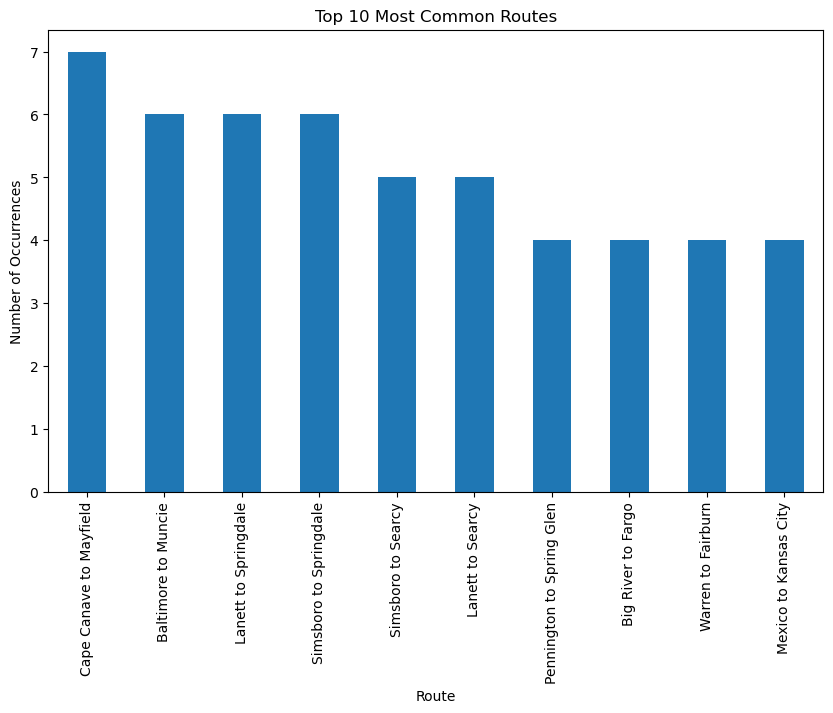

In [28]:
#top 10 most common routes
import matplotlib.pyplot as plt
df_cleaned['route'] = df_cleaned['origin_city'] + ' to ' + df_cleaned['destination_city']
route_counts = df_cleaned['route'].value_counts()
top_routes = route_counts.head(10)
print("Top 10 Most Common Routes:")
print(top_routes)
top_routes.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Common Routes')
plt.xlabel('Route')
plt.ylabel('Number of Occurrences')
plt.show()

Average Time Span for Shipments: 18 hours and 25 minutes


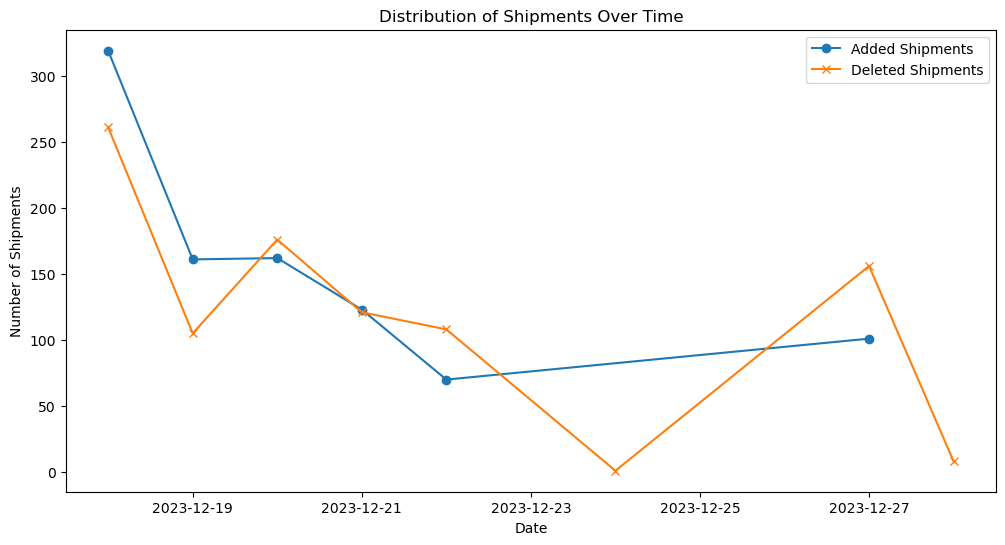

In [32]:
#Average Time Of Shipmentsss
average_time_span_seconds = df_cleaned['time_span_seconds'].mean()

average_hours = int(average_time_span_seconds // 3600)
average_minutes = int((average_time_span_seconds % 3600) // 60)

print(f"Average Time Span for Shipments: {average_hours} hours and {average_minutes} minutes")

plt.figure(figsize=(12, 6))
df_cleaned.groupby('added_date').size().plot(label='Added Shipments', marker='o')
df_cleaned.groupby('deleted_date').size().plot(label='Deleted Shipments', marker='x')
plt.title('Distribution of Shipments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Shipments')
plt.legend()
plt.show()

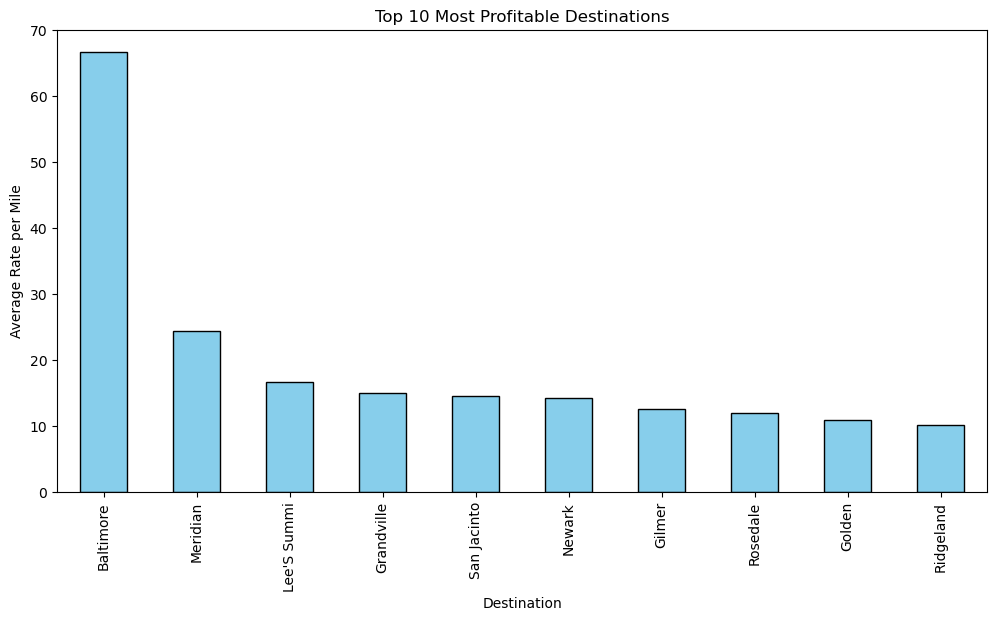

In [35]:
#most profitable
grouped_by_destination = df_cleaned.groupby('destination_city')


average_rate_per_mile = grouped_by_destination['average rate per mile'].mean()

sorted_destinations = average_rate_per_mile.sort_values(ascending=False)


top_destinations = sorted_destinations.head(10)
top_destinations.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Top 10 Most Profitable Destinations')
plt.xlabel('Destination')
plt.ylabel('Average Rate per Mile')
plt.show()

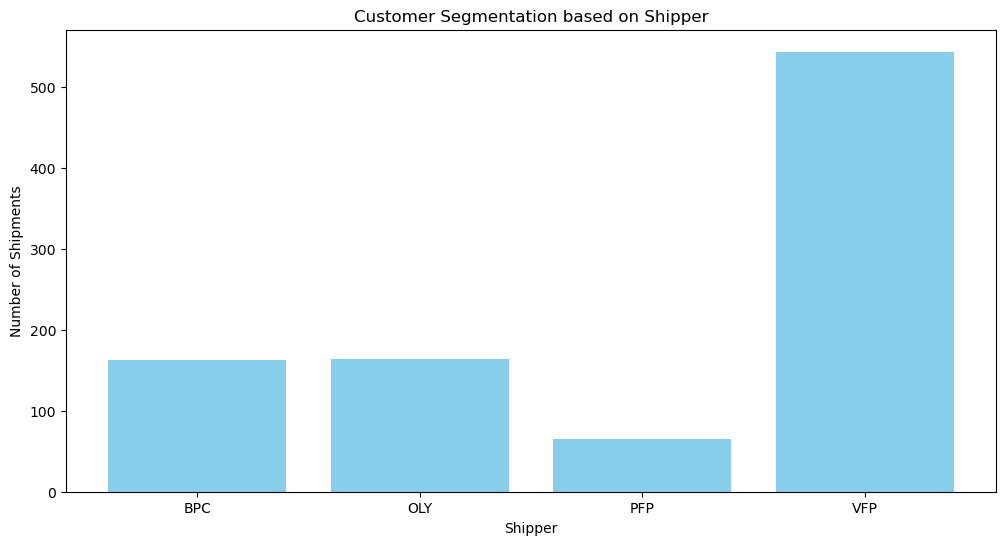

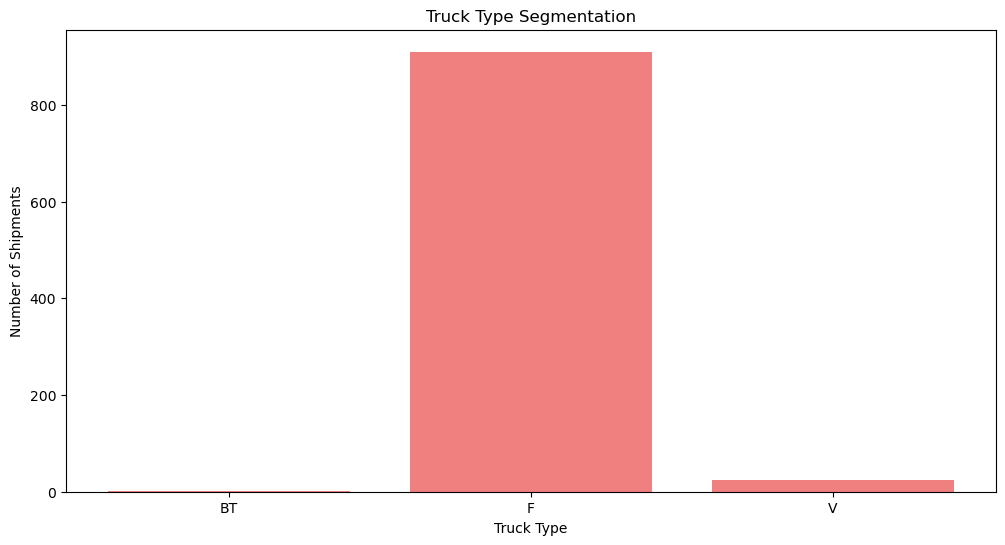

In [39]:
# Customer segmentation based on shipper and truck_type
shipper_segmentation = df_cleaned.groupby('shipper').size().reset_index(name='shipment_count')


plt.figure(figsize=(12, 6))
plt.bar(shipper_segmentation['shipper'], shipper_segmentation['shipment_count'], color='skyblue')
plt.title('Customer Segmentation based on Shipper')
plt.xlabel('Shipper')
plt.ylabel('Number of Shipments')
plt.show()


truck_type_segmentation = df_cleaned.groupby('truck_type').size().reset_index(name='shipment_count')

plt.figure(figsize=(12, 6))
plt.bar(truck_type_segmentation['truck_type'], truck_type_segmentation['shipment_count'], color='lightcoral')
plt.title('Truck Type Segmentation')
plt.xlabel('Truck Type')
plt.ylabel('Number of Shipments')
plt.show()


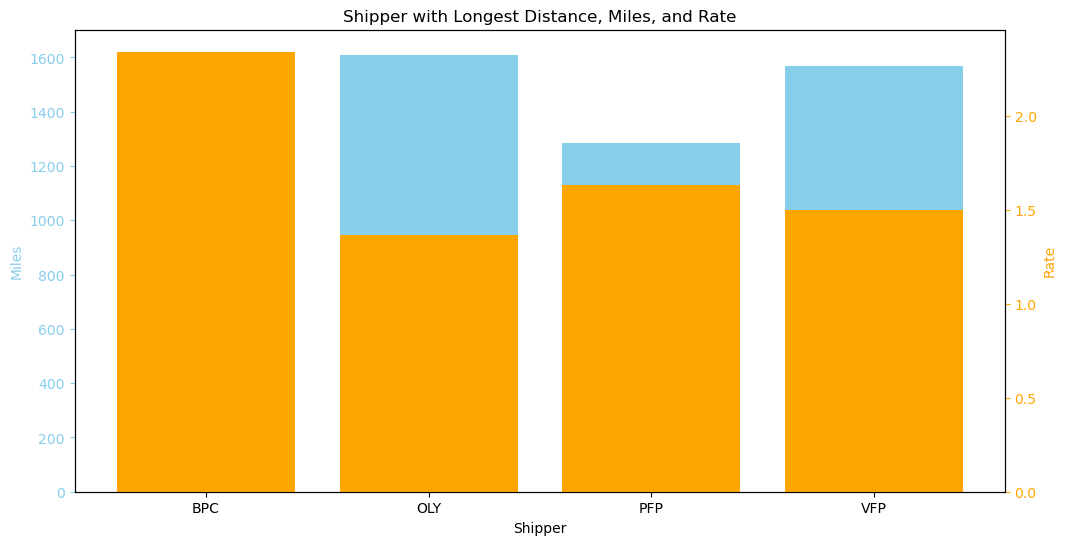

In [53]:
#shipper with longest distance and rate

largest_miles_by_shipper = df_cleaned.groupby('shipper')['Miles'].idxmax()

largest_miles_with_rate_by_shipper = df_cleaned.loc[largest_miles_by_shipper, ['shipper', 'Miles', 'min_rate', 'max_rate', 'average rate per mile']]


fig, ax = plt.subplots(figsize=(12, 6))


ax.bar(largest_miles_with_rate_by_shipper['shipper'], largest_miles_with_rate_by_shipper['Miles'], color='skyblue', label='Miles')
ax.set_xlabel('Shipper')
ax.set_ylabel('Miles', color='skyblue')
ax.tick_params('y', colors='skyblue')


ax2 = ax.twinx()
ax2.bar(largest_miles_with_rate_by_shipper['shipper'], largest_miles_with_rate_by_shipper['average rate per mile'], color='orange', label='Rate')
ax2.set_ylabel('Rate', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Shipper with Longest Distance, Miles, and Rate')
plt.show()

Mean Squared Error: 6.8021259589935745
R-squared: 0.15763429851500144


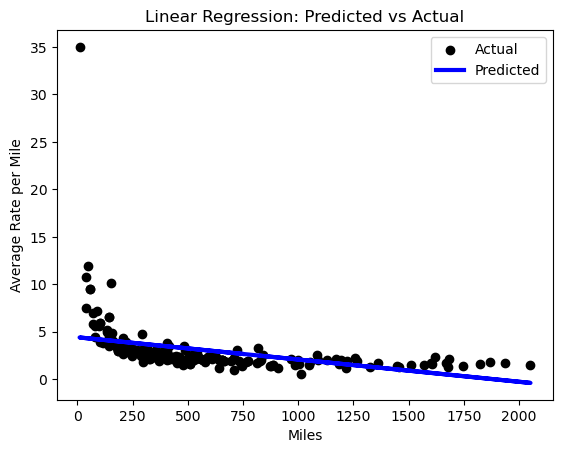

In [55]:
# here is the predicted average rate per mile and actual
df = df.dropna(subset=['average rate per mile'])


features = ['Miles']
target = 'average rate per mile'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Miles')
plt.ylabel('Average Rate per Mile')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()


In [62]:
#rate optimization
rate_stats = df_cleaned['average rate per mile'].describe()
print(rate_stats)

count    990.000000
mean       2.943271
std        3.248018
min        0.542942
25%        1.895984
50%        2.314959
75%        2.964427
max       66.666667
Name: average rate per mile, dtype: float64


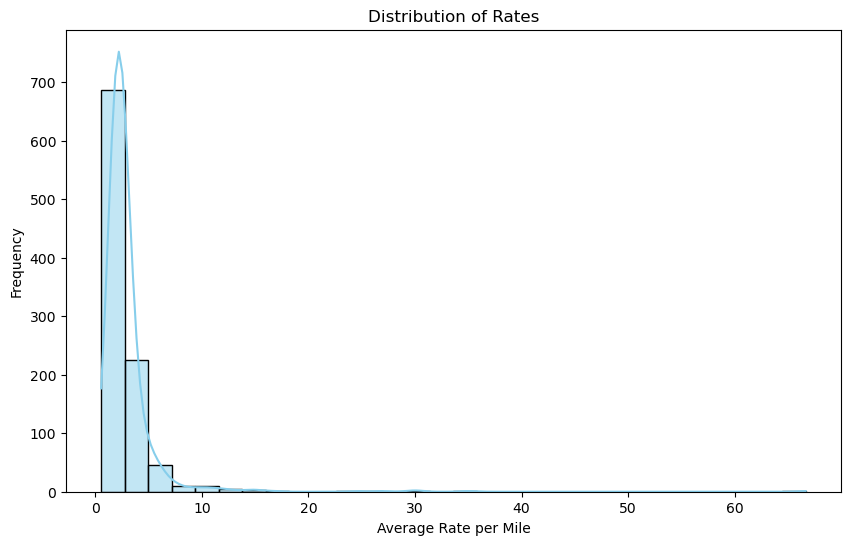

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['average rate per mile'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rates')
plt.xlabel('Average Rate per Mile')
plt.ylabel('Frequency')
plt.show()


In [65]:
# Identify and handle outliers
q1 = df_cleaned['average rate per mile'].quantile(0.25)
q3 = df_cleaned['average rate per mile'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_cleaned[(df_cleaned['average rate per mile'] < lower_bound) | (df_cleaned['average rate per mile'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
       reference_id    added_time_stamp  deleted_time_stamp  time_span  \
139        30316819 2023-12-20 08:12:09 2023-12-20 08:14:40    0:02:31   
245        30314464 2023-12-18 17:37:12 2023-12-18 17:38:36    0:01:24   
862        30314682 2023-12-18 11:04:02 2023-12-18 13:10:23    2:06:21   
868        30317000 2023-12-19 17:36:03 2023-12-20 10:32:52   16:56:49   
875        30317804 2023-12-20 11:38:27 2023-12-21 14:07:05   26:28:38   
...             ...                 ...                 ...        ...   
11009      30317062 2023-12-19 17:36:03 2023-12-20 12:36:32   19:00:29   
11111      30317396 2023-12-20 08:04:38 2023-12-20 08:24:41    0:20:03   
11240      30315718 2023-12-18 14:20:03 2023-12-18 14:41:29    0:21:26   
11241      30315720 2023-12-18 14:20:03 2023-12-18 14:57:30    0:37:27   
11370      30314862 2023-12-18 17:37:23 2023-12-18 17:38:41    0:01:18   

      destination_city destination_state origin_city origin_state    comment  \
139            ORLAND

In [74]:
shipper_description = df['shipper'].describe()
print(shipper_description)
shipper_distribution = df['shipper'].value_counts()
print(shipper_distribution)

count     990
unique      4
top       VFP
freq      568
Name: shipper, dtype: object
shipper
VFP    568
BPC    190
OLY    167
PFP     65
Name: count, dtype: int64


In [76]:
shipper_description = df['truck_type'].describe()
print(shipper_description)
shipper_distribution = df['truck_type'].value_counts()
print(shipper_distribution)

count     990
unique      3
top         F
freq      958
Name: truck_type, dtype: object
truck_type
F     958
V      31
BT      1
Name: count, dtype: int64


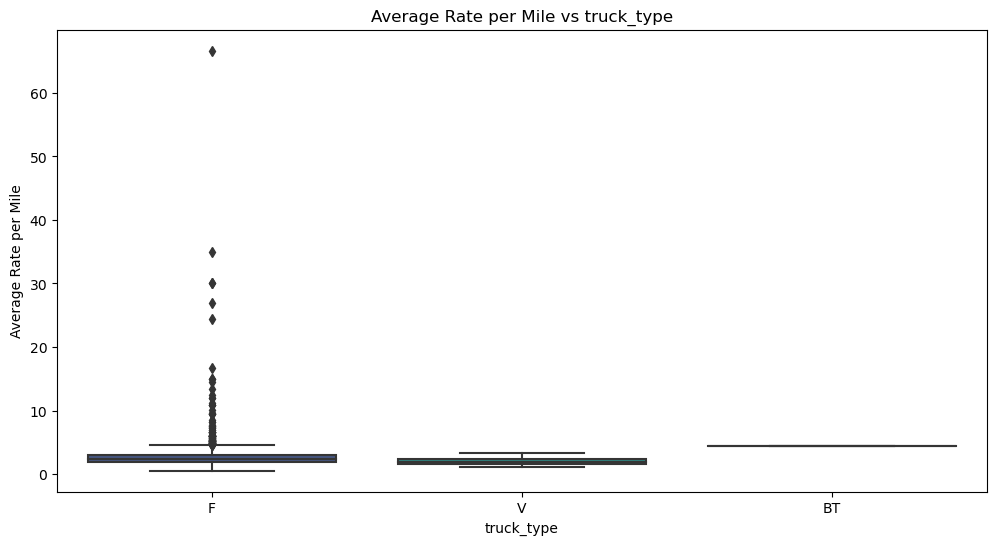

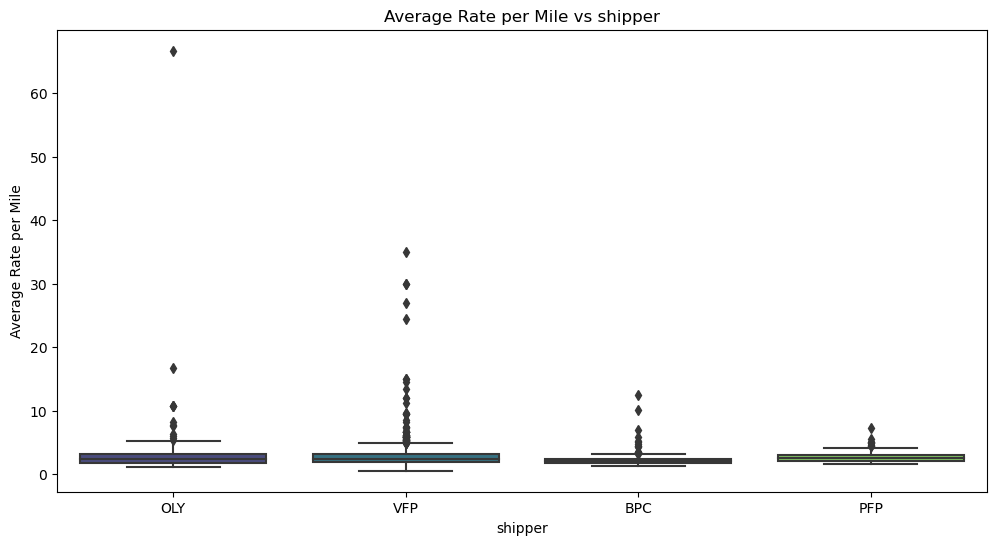

In [77]:
# Explore factors affecting rates
rate_factors = [ 'truck_type', 'shipper']  # Add other relevant features
for factor in rate_factors:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=factor, y='average rate per mile', data=df_cleaned, palette='viridis')
    plt.title(f'Average Rate per Mile vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Average Rate per Mile')
    plt.show()

count     45.000000
mean      22.000000
std       28.552185
min        1.000000
25%        7.000000
50%       14.000000
75%       28.000000
max      169.000000
Name: count, dtype: float64
Top 10 Destination States:
destination_state
TX    169
FL     76
IN     66
WI     50
KY     49
AR     47
IL     44
GA     37
OH     34
AL     31
Name: count, dtype: int64


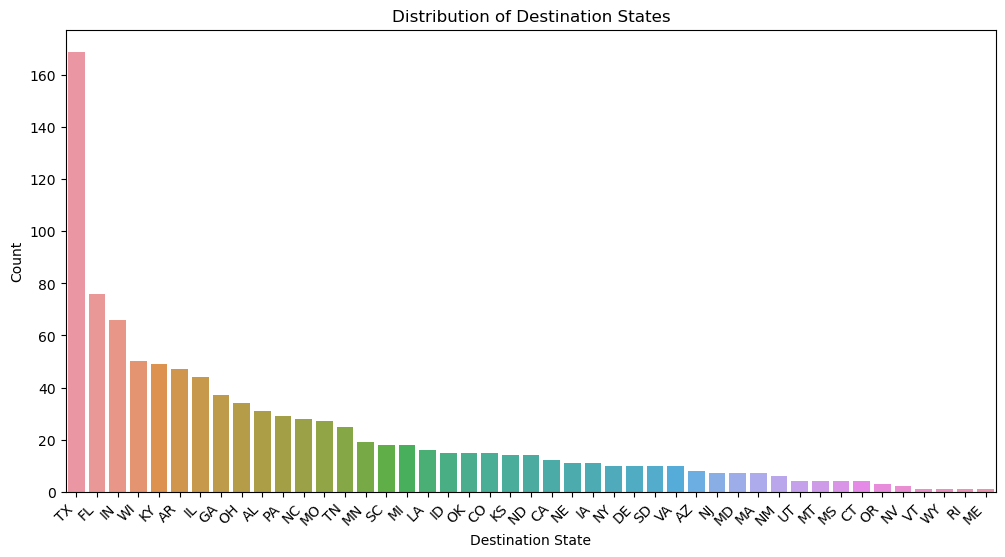

In [84]:
#destination with more distributions, top 10 destinations

destination_state_counts = df['destination_state'].value_counts()


print(destination_state_counts.describe())


print("Top 10 Destination States:")
print(destination_state_counts.head(10))

plt.figure(figsize=(12, 6))
sns.countplot(x='destination_state', data=df, order=df['destination_state'].value_counts().index)
plt.title('Distribution of Destination States')
plt.xlabel('Destination State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()



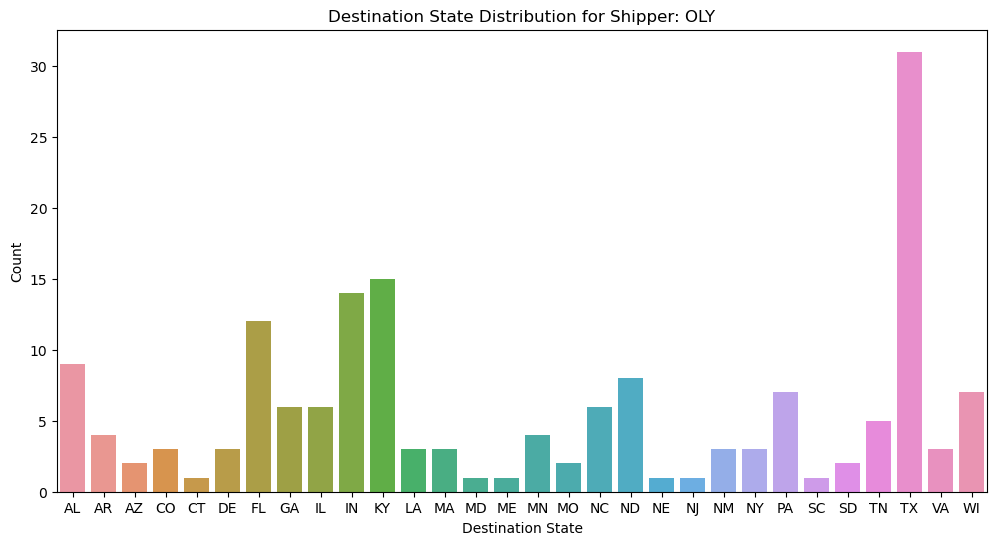

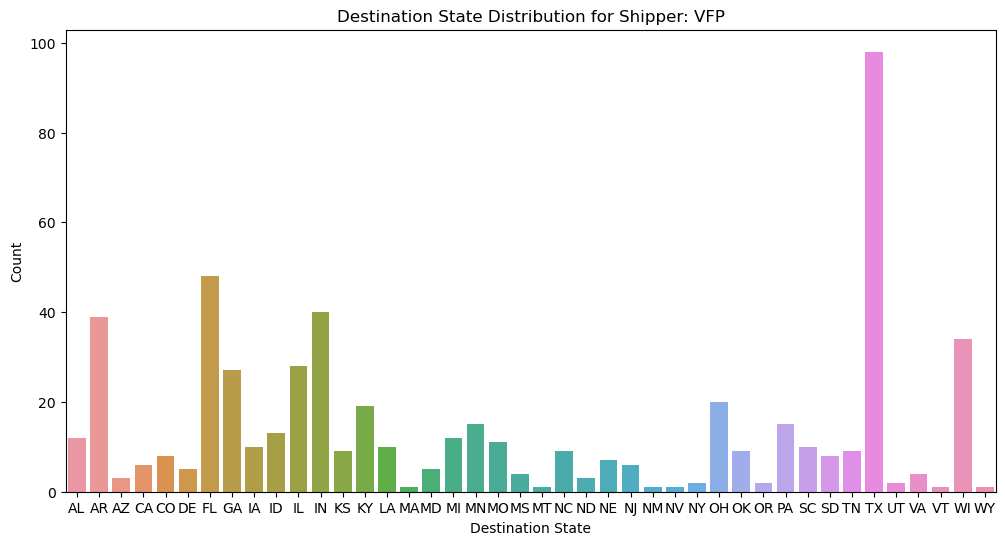

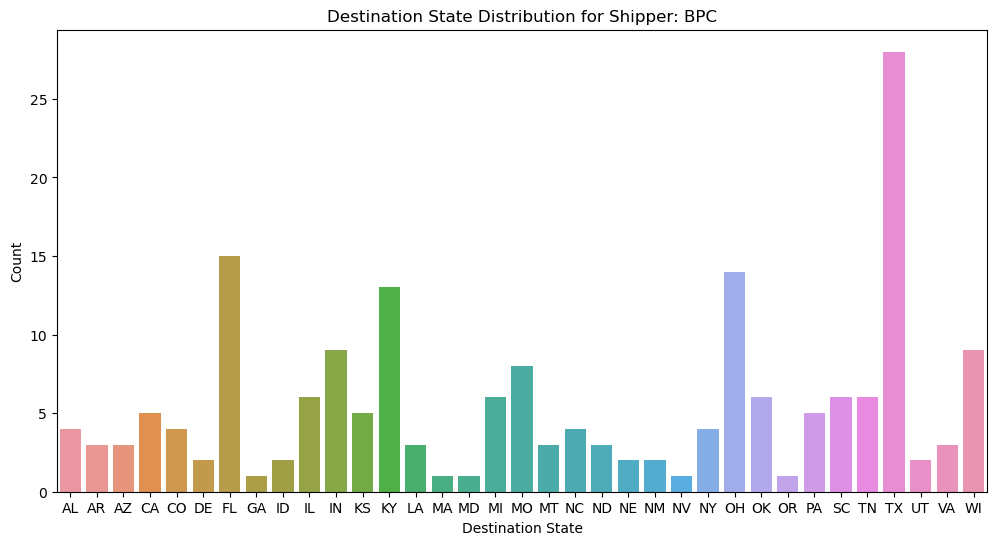

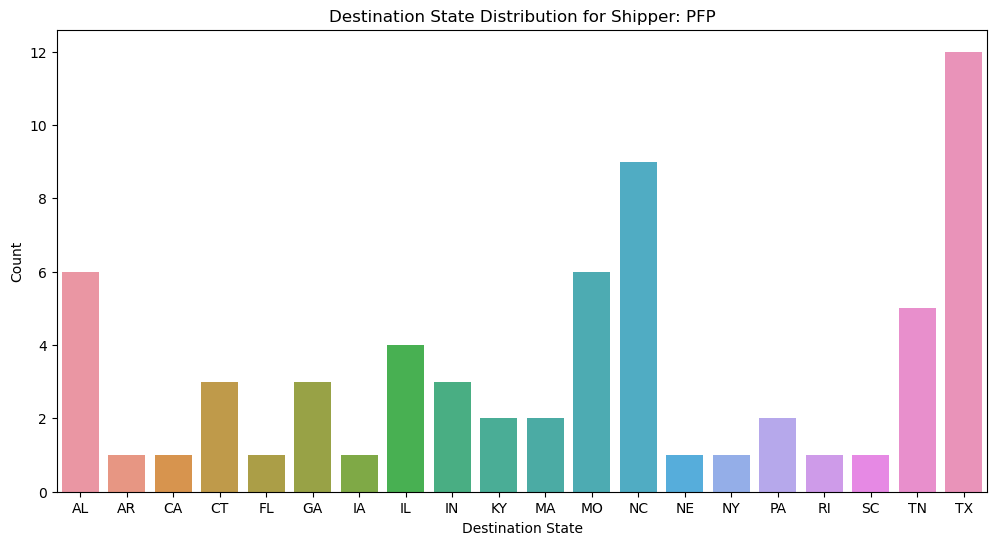

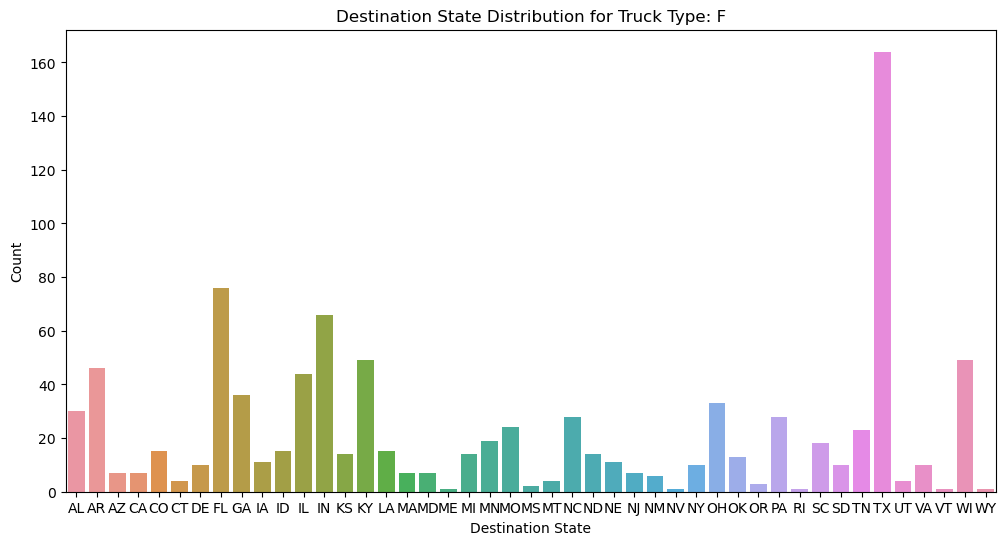

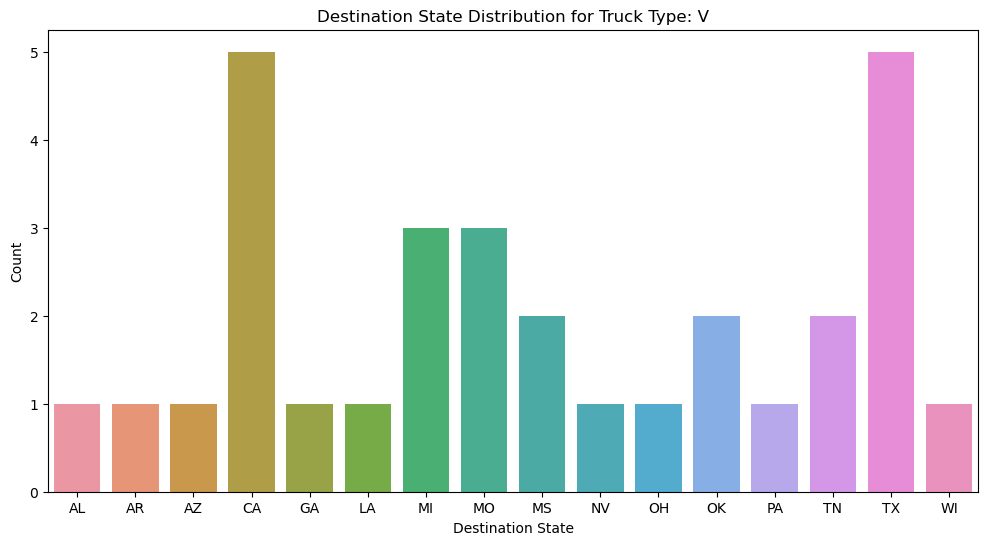

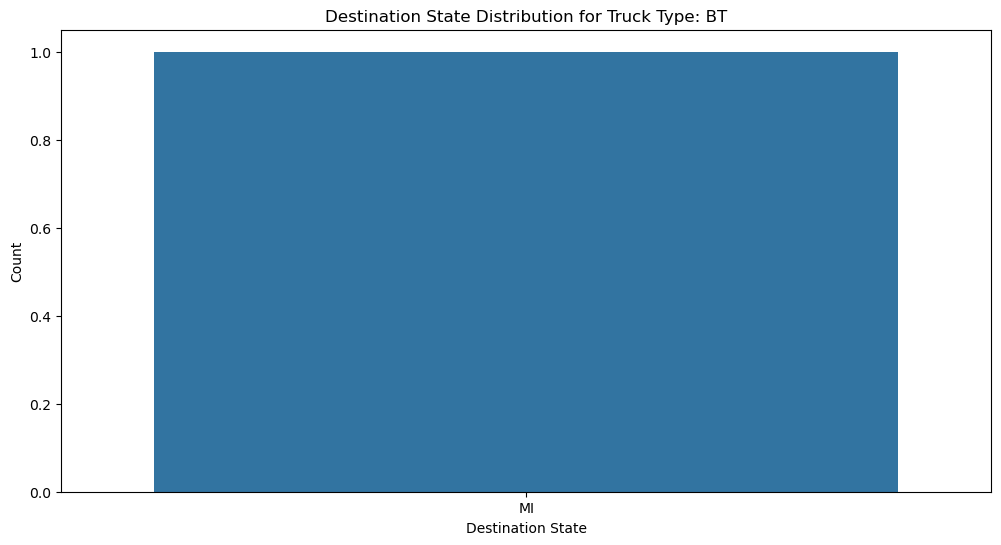

In [82]:
# here analysed and visualized the shipper and truck have more destination_state


def create_bar_chart(data, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data['destination_state'], y=data['count'])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

#shipper
for shipper in df['shipper'].unique():
    shipper_data = shipper_destination_counts[shipper_destination_counts['shipper'] == shipper]
    create_bar_chart(shipper_data, f'Destination State Distribution for Shipper: {shipper}', 'Destination State', 'Count')

# truck
for truck_type in df['truck_type'].unique():
    truck_data = truck_destination_counts[truck_destination_counts['truck_type'] == truck_type]
    create_bar_chart(truck_data, f'Destination State Distribution for Truck Type: {truck_type}', 'Destination State', 'Count')



Top 10 Destination Cities:
destination_city
MAYFIELD       19
KISSIMMEE      18
HOUSTON        15
SPRINGDALE     14
DALLAS         14
FT WORTH       12
SEARCY         12
WINTER HAVE    11
EL PASO        10
FARGO           8
Name: count, dtype: int64


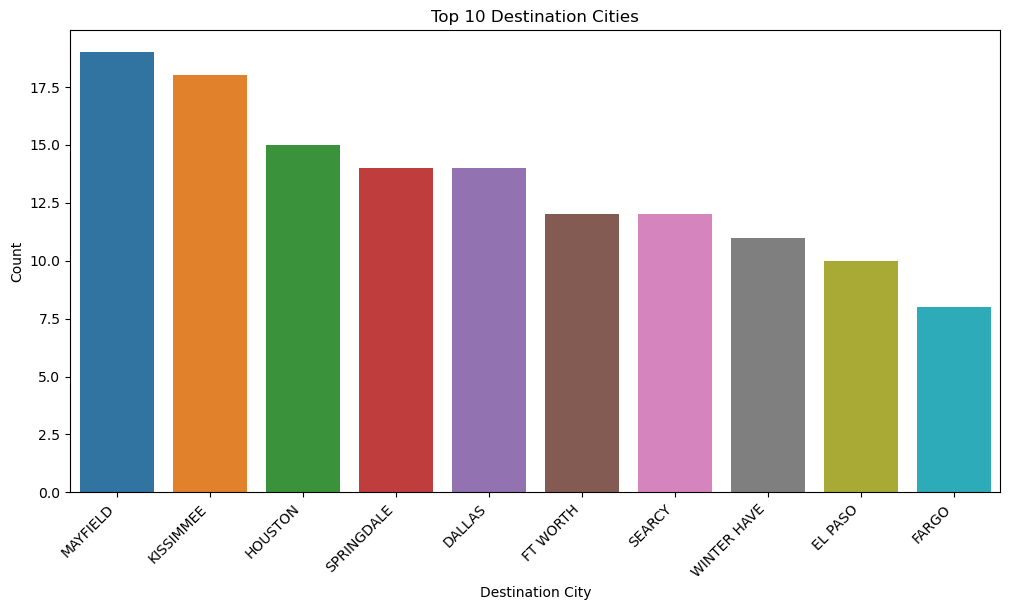

In [87]:
#top 10 distribution ciites
top_10_destination_city_counts = df['destination_city'].value_counts().head(10)


print("Top 10 Destination Cities:")
print(top_10_destination_city_counts)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_destination_city_counts.index, y=top_10_destination_city_counts.values)
plt.title('Top 10 Destination Cities')
plt.xlabel('Destination City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [94]:

total_unique_cities = df['destination_city'].nunique()

print(f"The total number of unique destination cities is: {total_unique_cities}")

destination_city_counts = df['destination_city'].value_counts()

# the city with lowest distribution
lowest_distribution_city = destination_city_counts.idxmin()
count_lowest_distribution_city = destination_city_counts.min()

print(f"The city with the lowest distribution is {lowest_distribution_city} with {count_lowest_distribution_city} occurrences.")



The total number of unique destination cities is: 479
The city with the lowest distribution is EWING with 1 occurrences.
